In [1]:
# Clone repo and install dependencies
%%capture
!git clone https://github.com/shahineb/demo-bc3-emulator.git
%cd demo-bc3-emulator
!pip install equinox diffrax healpy xarray
from tqdm.notebook import tqdm

In [3]:
# Compile and load emulator (takes ~1min)
import utils
emulator = utils.make_emulator(n_steps=30)  # More steps is better but slower

In [4]:
# Specify GMST and month at which we emulate

ΔT = 1  # 1K anomaly wrt pre-industrial
month = 2  # February

In [8]:
# Generate samples
n_samples = 20
samples = []
for seed in tqdm(range(n_samples)):
  sample = emulator(ΔT, month, seed)
  samples.append(sample)

  0%|          | 0/20 [00:00<?, ?it/s]

In [13]:
# Wrap into an xarray to manipulate
emulated_ds = wrap_as_xarray(samples)
emulated_ds

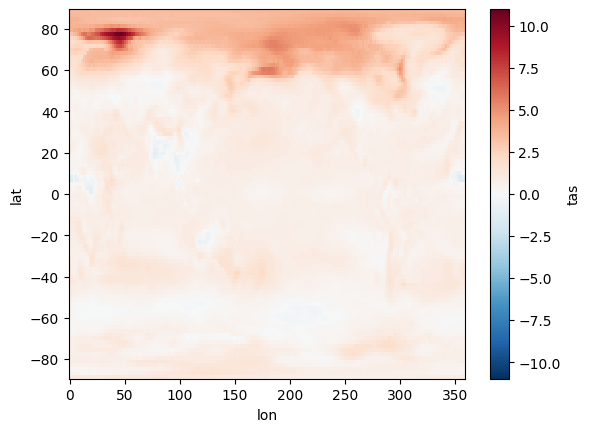

In [16]:
# Do your plots
emulated_ds['tas'].mean('member').plot()

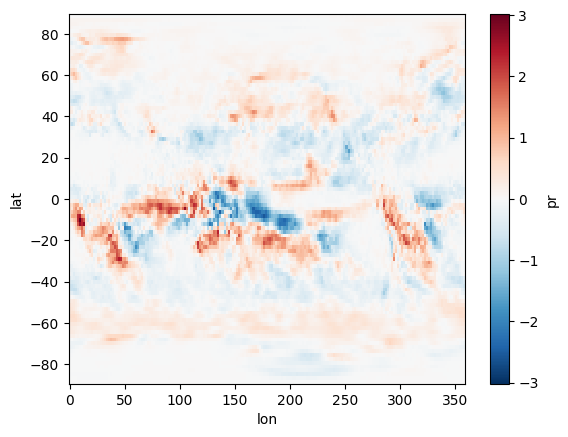

In [17]:
emulated_ds['pr'].mean('member').plot()

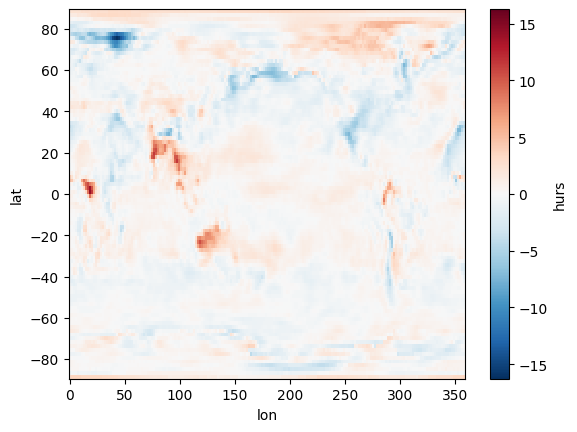

In [18]:
emulated_ds['hurs'].mean('member').plot()

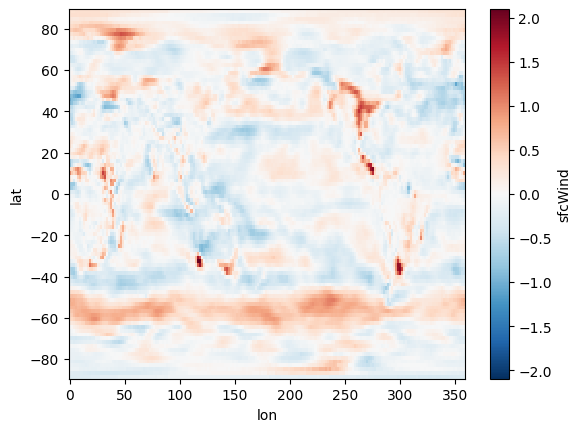

In [19]:
emulated_ds['sfcWind'].mean('member').plot()